

```
# This is formatted as code
```

# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/ds4e/visualization`
### Do One.

**Q1.** This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `./data/college_completion.csv` data with Pandas.
2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see.
4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.
5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?
6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?
7. Make a kernel density plot of `aid_value`. Now group your graph by `level` and `control`. What explains the shape of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.
8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

Question 1, part 1

In [13]:
! git clone https://github.com/ds4e/visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Load the CSV file into a DataFrame
df = pd.read_csv('/content/visualization/assignment/data/college_completion.csv')

print(df.head())
df.shape

fatal: destination path 'visualization' already exists and is not an empty directory.
   index  unitid                            chronname        city    state  \
0      0  100654               Alabama A&M University      Normal  Alabama   
1      1  100663  University of Alabama at Birmingham  Birmingham  Alabama   
2      2  100690                   Amridge University  Montgomery  Alabama   
3      3  100706  University of Alabama at Huntsville  Huntsville  Alabama   
4      4  100724             Alabama State University  Montgomery  Alabama   

    level                 control  \
0  4-year                  Public   
1  4-year                  Public   
2  4-year  Private not-for-profit   
3  4-year                  Public   
4  4-year                  Public   

                                               basic hbcu flagship  ...  \
0  Masters Colleges and Universities--larger prog...    X      NaN  ...   
1  Research Universities--very high research acti...  NaN      NaN  ... 

(3798, 63)

Question 1, part 2

Dimensions: 5 rows & 63 columns

Observations: 3,798

Variables: 'index', 'unitid', 'chronname', 'city', 'state', 'level', 'control',
       'basic', 'hbcu', 'flagship', 'long_x', 'lat_y', 'site', 'student_count',
       'awards_per_value', 'awards_per_state_value', 'awards_per_natl_value',
       'exp_award_value', 'exp_award_state_value', 'exp_award_natl_value',
       'exp_award_percentile', 'ft_pct', 'fte_value', 'fte_percentile',
       'med_sat_value', 'med_sat_percentile', 'aid_value', 'aid_percentile',
       'endow_value', 'endow_percentile', 'grad_100_value',
       'grad_100_percentile', 'grad_150_value', 'grad_150_percentile',
       'pell_value', 'pell_percentile', 'retain_value', 'retain_percentile',
       'ft_fac_value', 'ft_fac_percentile', 'vsa_year',
       'vsa_grad_after4_first', 'vsa_grad_elsewhere_after4_first',
       'vsa_enroll_after4_first', 'vsa_enroll_elsewhere_after4_first',
       'vsa_grad_after6_first', 'vsa_grad_elsewhere_after6_first',
       'vsa_enroll_after6_first', 'vsa_enroll_elsewhere_after6_first',
       'vsa_grad_after4_transfer', 'vsa_grad_elsewhere_after4_transfer',
       'vsa_enroll_after4_transfer', 'vsa_enroll_elsewhere_after4_transfer',
       'vsa_grad_after6_transfer', 'vsa_grad_elsewhere_after6_transfer',
       'vsa_enroll_after6_transfer', 'vsa_enroll_elsewhere_after6_transfer',
       'similar', 'state_sector_ct', 'carnegie_ct', 'counted_pct', 'nicknames',
       'cohort_size'

Question 1, part 3

In [14]:
# Cross-tabulate 'control' and 'level'
control_level_crosstab = pd.crosstab(df['control'], df['level'])

# Display the cross-tabulation
print(control_level_crosstab)

level                   2-year  4-year
control                               
Private for-profit         465     527
Private not-for-profit      68    1180
Public                     926     632


Patterns: The majority of students at Private not-for-profit institutions are enrolled in 4-year programs, with only a small proportion in 2-year programs. This indicates that Private not-for-profit schools likely offer predominantly 4-year degree programs. Public institutions have a larger number of students in 2-year programs compared to 4-year programs. This could suggest that public colleges and universities may have a higher proportion of students opting for associate degree programs, or that public 2-year institutions (such as community colleges) are more common.



Question 1, part 4

<ipython-input-15-f9a2a6c87348>:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['grad_100_value'], shade=True, color='orange')


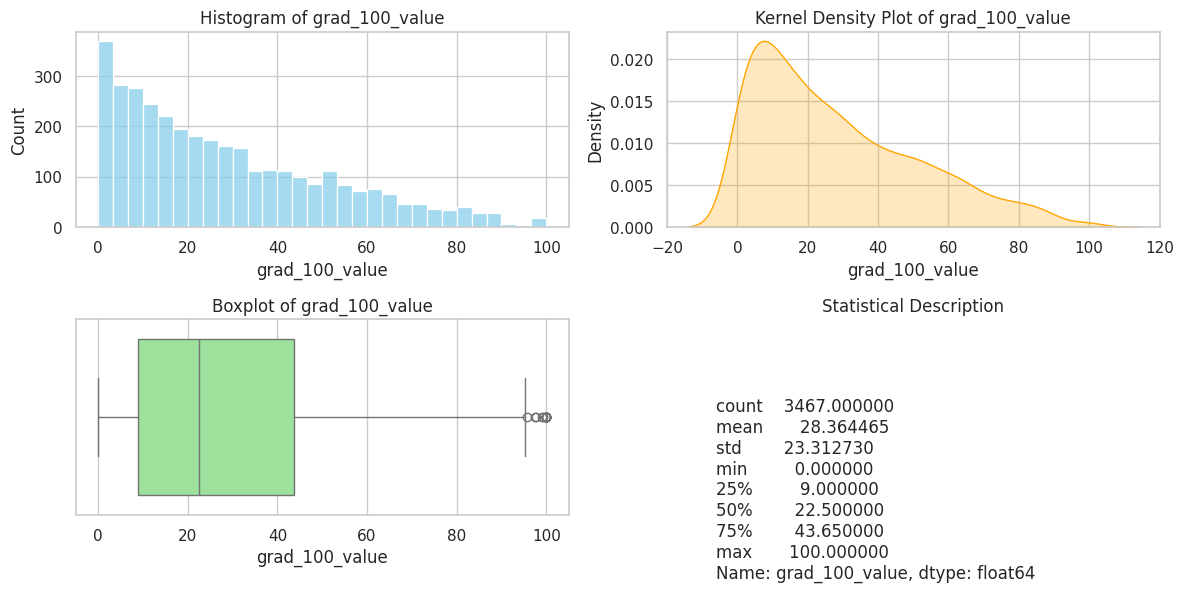

In [15]:
# Set the style for plots
sns.set(style="whitegrid")

# Create the histogram
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.histplot(df['grad_100_value'], kde=False, bins=30, color='skyblue')
plt.title('Histogram of grad_100_value')

# Create the Kernel Density Plot
plt.subplot(2, 2, 2)
sns.kdeplot(df['grad_100_value'], shade=True, color='orange')
plt.title('Kernel Density Plot of grad_100_value')

# Create the Boxplot
plt.subplot(2, 2, 3)
sns.boxplot(x=df['grad_100_value'], color='lightgreen')
plt.title('Boxplot of grad_100_value')

# Display the statistical description of the data
plt.subplot(2, 2, 4)
description = df['grad_100_value'].describe()
plt.text(0.1, 0.6, f"{description}", fontsize=12, verticalalignment='top')
plt.axis('off')
plt.title('Statistical Description')

# Show all the plots
plt.tight_layout()
plt.show()

Question 1, part 5

Grouped Statistical Descriptions by Control:
                         count       mean        std  min    25%   50%    75%  \
control                                                                         
Private for-profit       779.0  29.108858  25.601687  0.0   6.95  24.7  46.75   
Private not-for-profit  1189.0  41.660976  23.551231  0.0  25.00  41.0  58.30   
Public                  1499.0  17.430887  14.729443  0.0   6.90  13.2  23.25   

                          max  
control                        
Private for-profit      100.0  
Private not-for-profit  100.0  
Public                   97.8  

Grouped Statistical Descriptions by Level:
         count       mean        std  min   25%   50%     75%    max
level                                                               
2-year  1455.0  21.636151  21.645747  0.0   6.0  13.0  30.600  100.0
4-year  2012.0  33.230119  23.270160  0.0  15.2  29.7  49.225  100.0


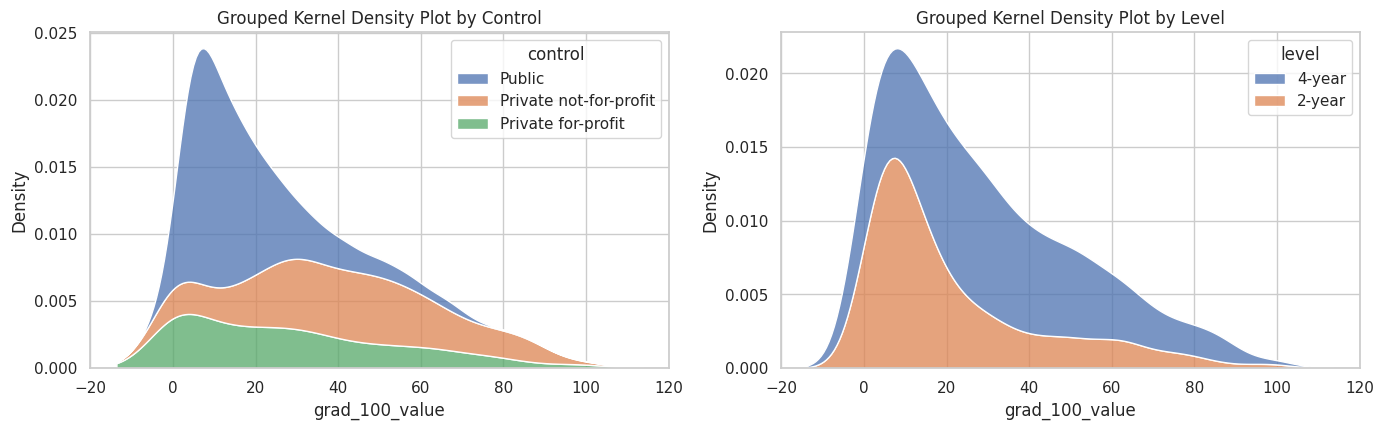

In [16]:
# Set the style for plots
sns.set(style="whitegrid")

# Create the grouped kernel density plots
plt.figure(figsize=(14, 8))

# Kernel Density Plot by 'control'
plt.subplot(2, 2, 1)
sns.kdeplot(data=df, x='grad_100_value', hue='control', multiple='stack', fill=True)
plt.title('Grouped Kernel Density Plot by Control')

# Kernel Density Plot by 'level'
plt.subplot(2, 2, 2)
sns.kdeplot(data=df, x='grad_100_value', hue='level', multiple='stack', fill=True)
plt.title('Grouped Kernel Density Plot by Level')

# Display the grouped statistical descriptions
grouped_control = df.groupby('control')['grad_100_value'].describe()
grouped_level = df.groupby('level')['grad_100_value'].describe()

# Print out the statistical descriptions for interpretation
print("Grouped Statistical Descriptions by Control:")
print(grouped_control)
print("\nGrouped Statistical Descriptions by Level:")
print(grouped_level)

# Show the plots
plt.tight_layout()
plt.show()

Observations: Most people go to public school, followed by private not-for-profit, and the least amount of people go to private school. Private not-for-profit institutions and 4-year programs appear to have the best graduation rates, as they are concentrated in the higher ranges of the grad_100_value. Private for-profit institutions and 2-year programs tend to have lower graduation rates, with their densities concentrated toward the lower values of grad_100_value.

Question 1, part 6

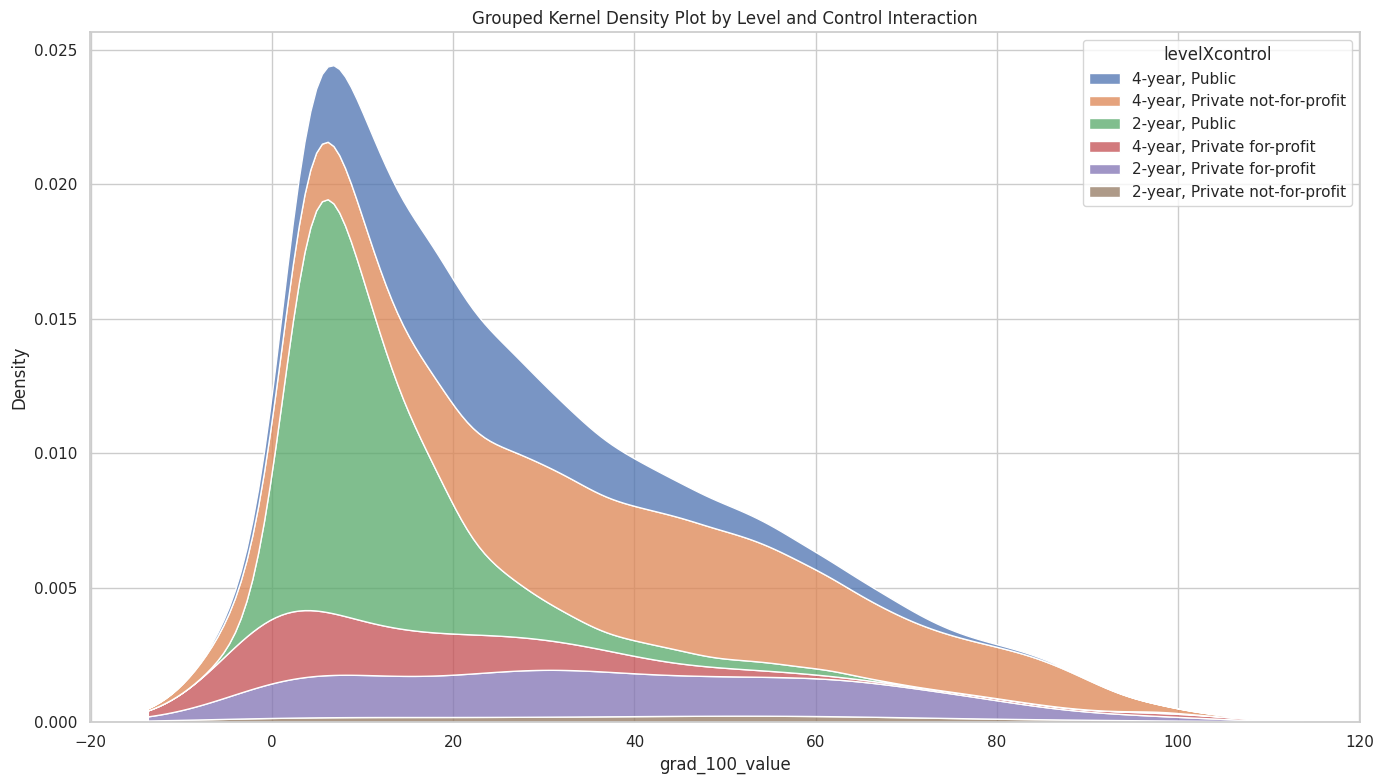

In [17]:
# Load the dataset again (adjust the path as needed)
df = pd.read_csv('/content/visualization/assignment/data/college_completion.csv')

# Create the new variable that interacts 'level' and 'control'
df['levelXcontrol'] = df['level'] + ', ' + df['control']

# Set the style for plots
sns.set(style="whitegrid")

# Create the grouped kernel density plot
plt.figure(figsize=(14, 8))
sns.kdeplot(data=df, x='grad_100_value', hue='levelXcontrol', multiple='stack', fill=True)

# Set the plot title
plt.title('Grouped Kernel Density Plot by Level and Control Interaction')

# Show the plot
plt.tight_layout()
plt.show()

Observations: The plot shows us that Private not-for-profit 4-year institutions have the best graduation rates, with a concentration of students graduating at higher rates (80-100%). In contrast, Private for-profit 2-year and Private for-profit 4-year institutions show much lower graduation rates, with peaks around the 10-40% range. Public 4-year institutions have moderate graduation rates, while Public 2-year institutions have the lowest graduation rates, concentrated in the 20-40% range.

Question 1, part 7

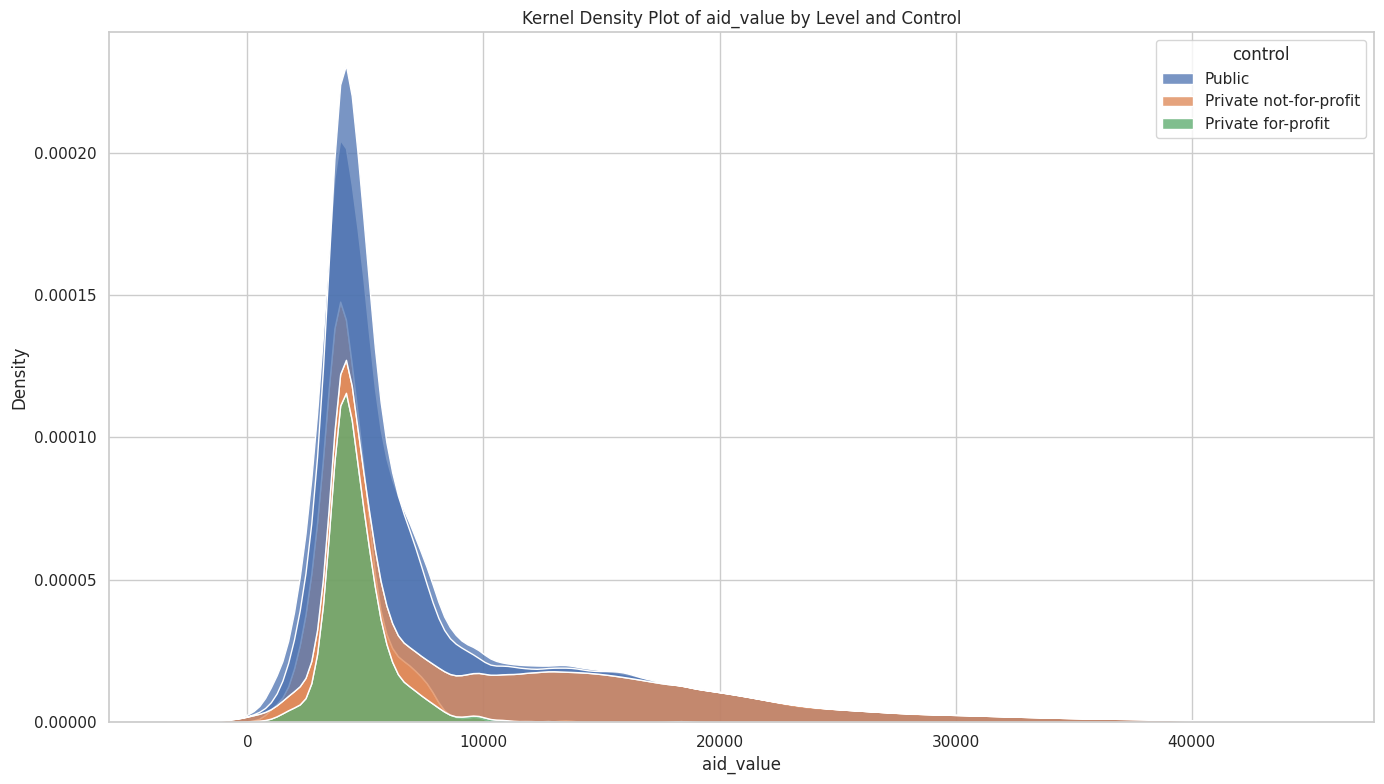

Grouped Statistical Descriptions by Level:
         count          mean          std    min     25%     50%      75%  \
level                                                                       
2-year  1458.0   4310.878601  1384.045631  294.0  3485.5  4113.0   4890.0   
4-year  2339.0  10235.379222  7227.369167  902.0  4830.5  7222.0  14046.0   

            max  
level            
2-year  13654.0  
4-year  41580.0  

Grouped Statistical Descriptions by Control:
                         count          mean          std    min      25%  \
control                                                                     
Private for-profit       991.0   4632.206862  1399.121259  294.0  3861.50   
Private not-for-profit  1248.0  14180.722756  7772.700998  902.0  8325.00   
Public                  1558.0   5094.835687  2136.436370  881.0  3725.25   

                            50%      75%      max  
control                                            
Private for-profit       4331.0   5131.5

In [18]:
# Create a kernel density plot for 'aid_value'
plt.figure(figsize=(14, 8))

# Kernel Density Plot grouped by 'level' and 'control'
sns.kdeplot(data=df, x='aid_value', hue='level', multiple='stack', fill=True, label='Level')
sns.kdeplot(data=df, x='aid_value', hue='control', multiple='stack', fill=True, label='Control')

# Set plot title
plt.title('Kernel Density Plot of aid_value by Level and Control')

# Show the plot
plt.tight_layout()
plt.show()

# Grouped statistical descriptions for 'aid_value' by 'level' and 'control'
grouped_level = df.groupby('level')['aid_value'].describe()
grouped_control = df.groupby('control')['aid_value'].describe()

# Display the grouped statistical descriptions
print("Grouped Statistical Descriptions by Level:")
print(grouped_level)
print("\nGrouped Statistical Descriptions by Control:")
print(grouped_control)

Observations: The sharp peak at lower values of aid_value suggests that most students in public institutions receive relatively low amounts of financial aid, with many students falling into the lower range of aid. This is likely because public institutions tend to have less financial aid available on average, with more students receiving minimal aid or none at all. The broader distribution, with more of a tail towards higher aid_value, indicates that private not-for-profit institutions offer a more diverse range of financial aid packages, which can be more generous for some students. This group has both a concentration of students receiving lower aid and a significant number receiving higher amounts, possibly due to institutional policies on need-based and merit-based aid.

Question 1, part 8

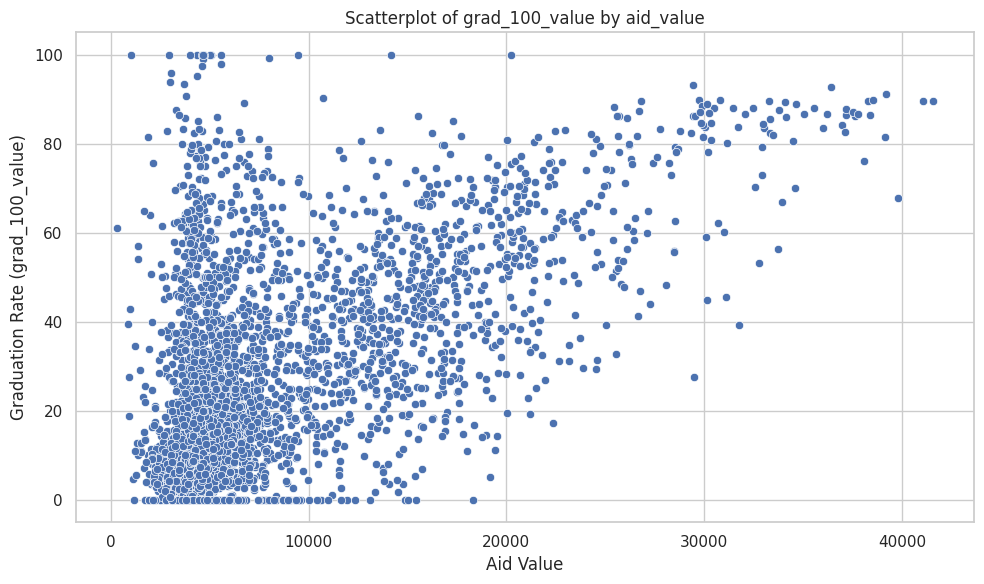

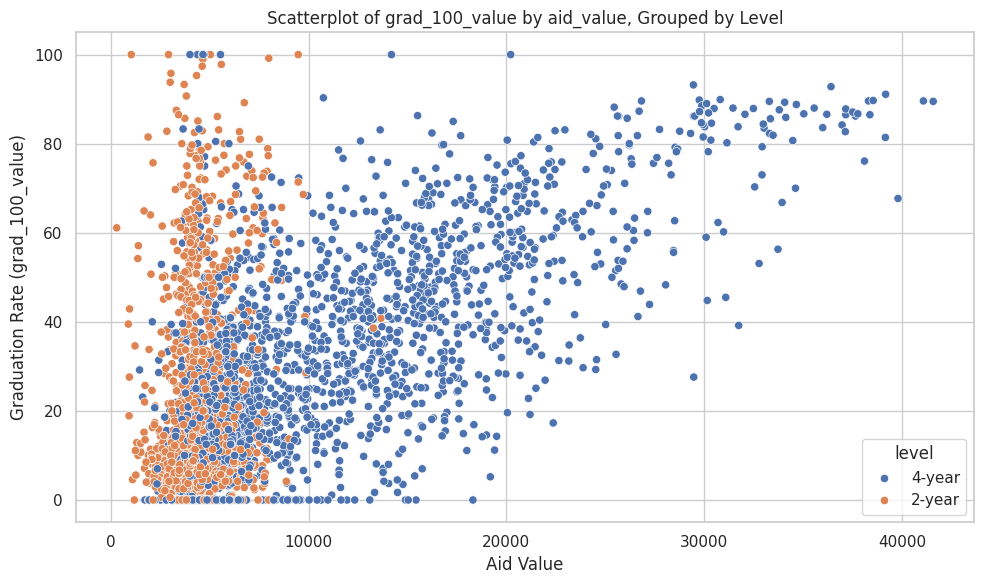

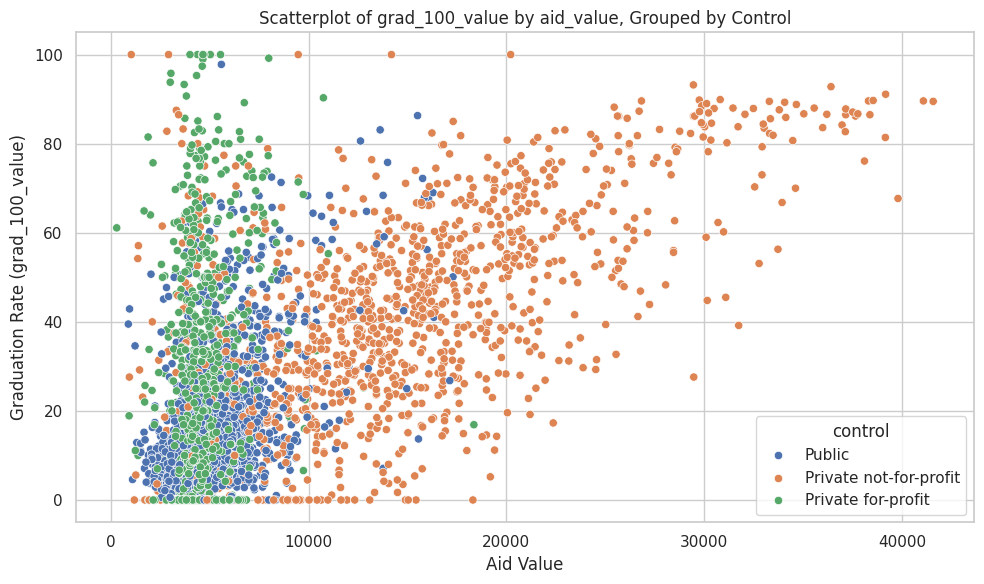

In [19]:
# Scatterplot of grad_100_value by aid_value
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['aid_value'], y=df['grad_100_value'])
plt.title('Scatterplot of grad_100_value by aid_value')
plt.xlabel('Aid Value')
plt.ylabel('Graduation Rate (grad_100_value)')
plt.tight_layout()
plt.show()

# Scatterplot grouped by 'level'
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['aid_value'], y=df['grad_100_value'], hue=df['level'])
plt.title('Scatterplot of grad_100_value by aid_value, Grouped by Level')
plt.xlabel('Aid Value')
plt.ylabel('Graduation Rate (grad_100_value)')
plt.tight_layout()
plt.show()

# Scatterplot grouped by 'control'
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['aid_value'], y=df['grad_100_value'], hue=df['control'])
plt.title('Scatterplot of grad_100_value by aid_value, Grouped by Control')
plt.xlabel('Aid Value')
plt.ylabel('Graduation Rate (grad_100_value)')
plt.tight_layout()
plt.show()

Observations: In the first graph, there seems to be a positive correlation between financial aid (aid_value) and graduation rate (grad_100_value). As the aid value increases, the graduation rate generally rises as well. This suggests that students receiving more financial aid tend to have higher graduation rates. The second and third graphs show that for 4-year, private not-for-profit institutions, aid seems to increase graduation rates.